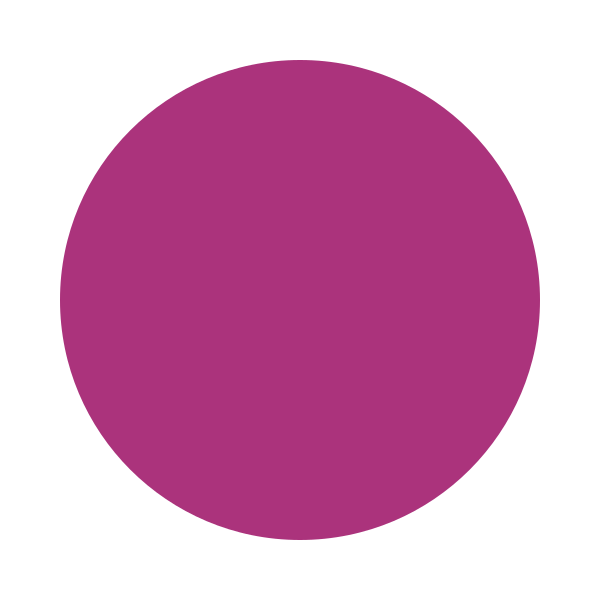

In [168]:
################# IMPORTS #################

from IPython.display import display
import math
import svgwrite
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime
import os

################# UTILITIES #################

def w(p):
    return p/100 * WIDTH

def h(p):
    return p/100 * HEIGHT

################# GLOBAL VARIABLES #################

WIDTH = 600
HEIGHT = 600
COLOR_SCHEME = 'magma'
IS_ANIMATED = True
SAVE_OUTPUT = False
DISPLAY_OUTPUT = True
SEED = 3

################# SCRIPT CUSTOM VARIABLES #################

################# START SCRIPT #################
dwg = svgwrite.Drawing('export.svg', profile='full', size=(WIDTH, HEIGHT))

######## filter definitions ########
### shiny filter ###
filter_shiny = dwg.defs.add(dwg.filter(id='filterShiny'))
filter_shiny.feDiffuseLighting(
    surfaceScale=20, 
    diffuseConstant=1,
    lighting_color="white",
    result="highlight"
).fePointLight(source=(w(70), h(40), 25))

filter_shiny.feComposite(operator="in", in_="highlight", in2="SourceAlpha", result="highlightApplied")
filter_shiny.feComposite(operator="arithmetic", k2="1", k3="1", in_="SourceGraphic", in2="highlightApplied")

### textured filter ###
filter_textured = dwg.defs.add(dwg.filter(id='filterTextured'))
filter_textured.feTurbulence(type="fractalNoise", baseFrequency=0.05, numOctaves=20, result="turbulence")
point_light = filter_textured.feDiffuseLighting(
    in_="turbulence",
    surfaceScale=20, 
    diffuseConstant=1,
    lighting_color="white",
    result="highlight"
).fePointLight(source=(w(40), h(10), 25))
filter_textured.feComposite(operator="in", in_="highlight", in2="SourceAlpha", result="highlightApplied")
filter_textured.feBlend(in_="SourceGraphic", in2="highlightApplied", mode="multiply")

animation_duration="5s"

animation_x = dwg.animate(
    attributeName="x",
    dur=animation_duration,
    repeatCount="indefinite",
    values=[w(10), w(90), w(10)],  # cy values at keyframes as a list of strings
    keyTimes="0;0.5;1",  # Keyframe times as a space-separated string
    calcMode="spline",  # Use spline mode for smooth easing
    keySplines="0.42 0 0.58 1;0.42 0 0.58 1"  # Control points for easing
        
)

animation_z = dwg.animate(
    attributeName="z",
    dur=animation_duration,
    repeatCount="indefinite",
    values=[5, 500, 5, 500, 5],  # cy values at keyframes as a list of strings
    keyTimes="0;0.25;0.5;0.75;1",  # Keyframe times as a space-separated string
    calcMode="spline",  # Use spline mode for smooth easing
    keySplines="0.42 0 0.58 1;0.42 0 0.58 1;0.42 0 0.58 1;0.42 0 0.58 1"  # Control points for easing 
)

point_light.add(animation_x)
point_light.add(animation_z)


######## draw shapes ########
random.seed(SEED)
colors = [mcolors.rgb2hex(color) for color in plt.get_cmap(COLOR_SCHEME).colors]

circle = dwg.circle(center=(w(50), h(50)), r=w(40), fill=random.choice(colors), filter=f"url(#filterTextured)")
dwg.add(circle)


animation_enabler = dwg.animate(
    attributeName="cx",
    from_=w(40),
    to=w(60),
    dur="2s",
    repeatCount="indefinite"
)
circle_enabler = dwg.circle(center=(w(50), h(50)), r=0, fill="black")
circle_enabler.add(animation_enabler)
dwg.add(circle_enabler)

if DISPLAY_OUTPUT:
    display(dwg)
    
dwg.save()